# The Best Classifier

In [2]:
import numpy as np
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

## Dataset

In [7]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-02-02 09:19:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100% 62.7K=0.4s

2022-02-02 09:19:06 (62.7 KB/s) - 'loan_train.csv' saved [23101/23101]



## Loading Data

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

## Data Cleaning and Preprocessing

### Convert to python date time object

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

### Data Exploration and Feature Extraction

In [6]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


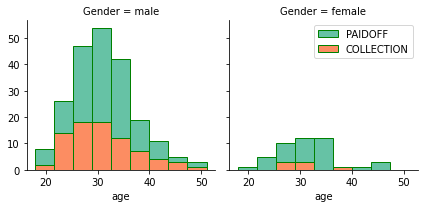

In [7]:
ag = np.linspace(df.age.min(), df.age.max(), 10)
p = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
p.map(plt.hist, 'age', bins=ag, ec="g")
p.axes[-1].legend()
plt.show()

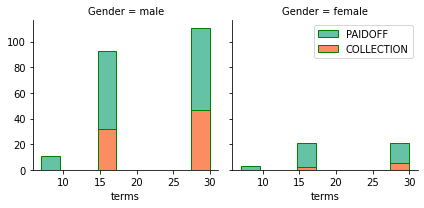

In [8]:
tms = np.linspace(df.terms.min(), df.terms.max(), 10)
p = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
p.map(plt.hist, 'terms', bins=tms, ec="g")
p.axes[-1].legend()
plt.show()

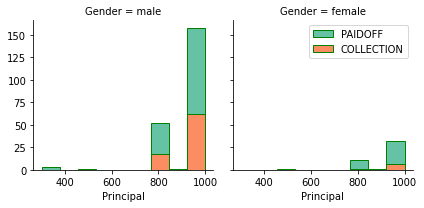

In [9]:
ppl = np.linspace(df.Principal.min(), df.Principal.max(), 10)
p = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
p.map(plt.hist, 'Principal', bins=ppl, ec="g")
p.axes[-1].legend()
plt.show()

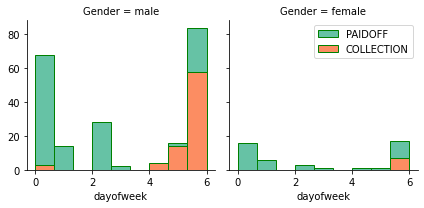

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
dow = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
p = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
p.map(plt.hist, 'dayofweek', bins=dow, ec="g")
p.axes[-1].legend()
plt.show()


It seems as though the day of the week creates more of a separation in the dataset.

### Creating a threshold to better separate the data

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

### Converting categorical variables to numeric variables

In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#### Using one hot encoding

We use one hot encoding to convert categorical variables to binary and add them to the dataset.

In [13]:
chosen = df[['Principal','terms','age','Gender','weekend']]
chosen = pd.concat([chosen,pd.get_dummies(df['education'])], axis=1)
chosen.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


## Selecting the features

In [14]:
X = chosen

In [15]:
y = df['loan_status'].values

## Normalising the data

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679]])

# Classification using ML algorithms

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg_classifier = LogisticRegression(solver='liblinear')


In [28]:
log_reg_classifier.fit(X, y)

LogisticRegression(solver='liblinear')

## SVM (Support Vector Machine)

In [23]:
from sklearn import svm

In [24]:
svm_classifier = svm.SVC(C=0.01, kernel='rbf')

In [25]:
svm_classifier.fit(X, y)

SVC(C=0.01)

## K Nearest Neighbour

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    ypred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, ypred)

k_best = mean_acc.argmax()+1

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors = k_best).fit(X,y)

### Predicting

In [20]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Accuracy evaluation

In [22]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7229437229437229
Test set Accuracy:  0.7913043478260869
